# 4.7

In [22]:
from sympy import *
init_printing()
from dtumathtools import *

In [ ]:
dtuplPT

In [3]:
l_2, I_t, k_2, k_c, k_1, l_g, m_r, g, k_b2, y1, y2, t, u, w, phi_u, m_2 = symbols('l_2, I_t, k_2, k_c, k_1, l_g, m_r, g, k_b2, y1, y2, t, u, w, phi_u m_2')
l_1 = symbols('l_1')
y1 = Function('y1')(t)
y2 = Function('y2')(t)

M = Matrix([[l_2**(-2) * I_t,0],[0,m_2]])
K = Matrix([[k_2 + l_2**(-2) *(k_c + l_1**2 * k_1 - l_g*m_r*g), -k_2], [-k_2, k_2 + k_b2]])
y = Matrix([y1, y2])
f = Matrix([l_2**(-1) * u*w**2 * sin(w*t*+phi_u),0])

M = M.subs({g:9.81,k_c:0.7,u:1.48*10**(-6),phi_u:7,m_r:0.616,m_2:1.410,I_t:31.2*10**(-3),l_g:0.188,l_2:0.263,k_b2:0.72*10**(3),k_1:1.66*10**3,k_2:1.61*10**3})
K = K.subs({g:9.81,k_c:0.7,u:1.48*10**(-6),phi_u:7,m_r:0.616,m_2:1.410,I_t:31.2*10**(-3),l_g:0.188,l_2:0.263,k_b2:0.72*10**(3),k_1:1.66*10**3,k_2:1.61*10**3, l_1:0.118})
f = f.subs({g:9.81,k_c:0.7,u:1.48*10**(-6),phi_u:7,m_r:0.616,m_2:1.410,I_t:31.2*10**(-3),l_g:0.188,l_2:0.263,k_b2:0.72*10**(3),k_1:1.66*10**3,k_2:1.61*10**3})

k_s, F_s0, h_p, c_s, n, z_2 = symbols('k_s, F_s0, h_p, c_s, n z_2' )
F_z_stjerne = -2*(k_s*(1+n*I)+F_s0/h_p*(1+c_s))*z_2
F_z_stjerne = F_z_stjerne.subs({c_s:0.24,h_p:12*10**(-3)})

F_FHM_stjerne = re(F_z_stjerne)
f_FHM = Matrix([0,F_FHM_stjerne])

lign13 = Eq(M*y.diff(t,2)+K*y -f_FHM,f)

a,b,w,t,phi = symbols('a,b,w,t,phi')

løs = solve(Eq(Matrix([a,b])*cos(w*t), f),[a,b])

a = løs[a]
b = løs[b]

f_tilde = Matrix([a,b])

z, K_tilde = symbols('z, K_tilde')


k_stjerne = (k_s*(1+n*I)+F_s0/h_p*(1+c_s))

K_tilde = Matrix([[k_2 + l_2**(-2) *(k_c + l_1**2 * k_1 - l_g*m_r*g), -k_2], [-k_2, k_stjerne*(k_2 + k_b2)]])

mydict = {g:9.81,k_c:0.7,u:1.48*10**(-6),phi_u:7,m_r:0.616,m_2:1.410,I_t:31.2*10**(-3),l_g:0.188,l_1: 0.118, l_2:0.263,k_b2:0.72*10**(3),k_1:1.66*10**3,k_2:1.61*10**3, h_p:12*10**(-3)}

In [4]:
e_a, e_b, phi_a, phi_b, c_s = symbols("e_a e_b phi_a phi_b c_s") 
mydict = {
    g:9.81,
    k_c:0.7,
    u:1.48*10**(-6),
    e_a:0.11*10**(-3),
    e_b:0.14*10**(-3),
    phi_u:7,
    phi_a:38,
    phi_b:-118,
    m_r:0.616,
    m_2:1.410,
    I_t:31.2*10**(-3),
    l_g:0.188,
    l_1:0.118,
    l_2:0.263,
    k_b2:0.72*10**(3),
    k_1:1.66*10**3,
    k_2:1.61*10**3,
    h_p:12*10**(-3),
    c_s:0.24,
}

In [5]:
k_stjerne = (k_s*(1+n*I)+F_s0/h_p*(1+c_s))
M = Matrix([[l_2**(-2) * I_t,0],[0,m_2]])
K = Matrix([[k_2 + l_2**(-2) *(k_c + l_1**2 * k_1 - l_g*m_r*g), -k_2], [-k_2, k_2 + k_b2 -2*k_stjerne]])
A = -M.inv()*K
A = A.subs(mydict)  
A

⎡-4296.14915128205                             3569.29775641026               
⎢                                                                             
⎣1141.84397163121   146.572104018913⋅Fₛ₀ + 1.41843971631206⋅kₛ⋅(ⅈ⋅n + 1) - 165

             ⎤
             ⎥
2.48226950355⎦

In [6]:
A30 = A.subs({    
    k_s: 0.83, # observeret
    n: 11*3, # observeret
    F_s0: 5.2})

A50 = A.subs({    
    k_s: 1, # observeret
    n: 22.5, # observeret
    F_s0: 8})

A70 = A.subs({    
    k_s: 1.37, # observeret
    n: 10.5, # observeret
    F_s0: 9.65})

A30vals = A30.eigenvects()
A50vals = A50.eigenvects()
A70vals = A70.eigenvects()

display(A30vals,A50vals,A70vals)

⎡⎛                                          ⎡⎡  0.967091354531414 + 0.01169915
⎢⎜-5234.0985694952 + 6.89776615195682⋅ⅈ, 1, ⎢⎢                                
⎣⎝                                          ⎣⎣-0.254157409462942 - 0.001205403

413801⋅ⅈ  ⎤⎤⎞  ⎛                                          ⎡⎡ 0.69846262688847 
          ⎥⎥⎟, ⎜48.8193945724828 + 31.9532976778304⋅ⅈ, 1, ⎢⎢                  
72359481⋅ⅈ⎦⎦⎠  ⎝                                          ⎣⎣0.850356067575216 

- 0.0117627878200135⋅ⅈ ⎤⎤⎞⎤
                       ⎥⎥⎟⎥
- 0.00806622501695358⋅ⅈ⎦⎦⎠⎦

⎡⎛                                           ⎡⎡ 0.971540703938891 + 0.00941407
⎢⎜-5165.64180713249 + 4.99397627531787⋅ⅈ, 1, ⎢⎢                               
⎣⎝                                           ⎣⎣-0.236683677932395 - 0.00093397

924313508⋅ⅈ ⎤⎤⎞  ⎛                                          ⎡⎡0.66106595225270
            ⎥⎥⎟, ⎜391.005658214506 + 26.9209173417034⋅ⅈ, 1, ⎢⎢                
1264105545⋅ⅈ⎦⎦⎠  ⎝                                          ⎣⎣0.86817109412402

6 - 0.0090145866256365⋅ⅈ ⎤⎤⎞⎤
                         ⎥⎥⎟⎥
3 - 0.00685184113767025⋅ⅈ⎦⎦⎠⎦

⎡⎛                                           ⎡⎡ 0.973816789967373 + 0.00593083
⎢⎜-5129.08533555031 + 2.96816792546358⋅ⅈ, 1, ⎢⎢                               
⎣⎝                                           ⎣⎣-0.227256144008546 - 0.00057421

976560015⋅ⅈ ⎤⎤⎞  ⎛                                          ⎡⎡0.64008248851240
            ⎥⎥⎟, ⎜596.817980958564 + 17.4360873936854⋅ⅈ, 1, ⎢⎢                
9194497144⋅ⅈ⎦⎦⎠  ⎝                                          ⎣⎣0.87748318138373

1 - 0.00551570914881716⋅ⅈ⎤⎤⎞⎤
                         ⎥⎥⎟⎥
9 - 0.00443438750349864⋅ⅈ⎦⎦⎠⎦


The following keyword arguments are unused.
* 'color': did you mean 'ncols'?


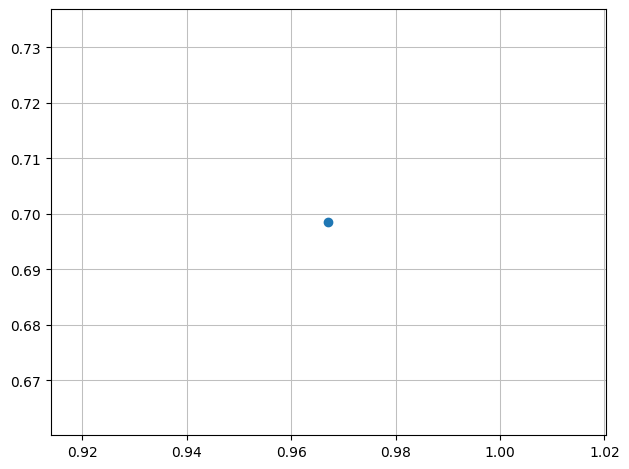

In [67]:
dtuplot.scatter([re((A30vals[0][2])[0])[0]],[re((A30vals[1][2])[0])[0]],color='red')

In [14]:
def dæmp(A):
    values = [sqrt(val).evalf() for val in A.eigenvals().keys()]
    for lamb in values:
        print(f"Tjekker {lamb}")
        xi = re(lamb)/abs(lamb)
        print(f"xi, dæmpning = {xi}")

dæmp(A30)
dæmp(A50)
dæmp(A70)

Tjekker 0.04767134752993 + 72.3470859264737*I
xi, dæmpning = 0.000658925464245171
Tjekker 7.3200468819878 + 2.18258832169893*I
xi, dæmpning = 0.958308681958388
Tjekker 0.03474195746869 + 71.8724078776835*I
xi, dæmpning = 0.000483383741211465
Tjekker 19.7855626584842 + 0.680317204175125*I
xi, dæmpning = 0.999409375835319
Tjekker 0.02072232551502 + 71.617635851549*I
xi, dæmpning = 0.000289346672801647
Tjekker 24.4324641202115 + 0.35682212215471*I
xi, dæmpning = 0.999893372422460


In [ ]:
# OBS vi har ikke alle værdierne
def plotløsning(lamb1,lamb2,A): # C1 = 1
    # omega d:
    omega_d1 = im(lamb1)
    omega_d2 = im(lamb2)
    
    # phi 1,1:
    phi11 = arg()

    # phi 1,c


    # phi 2,1:
    xi1  = re(lamb1)/abs(lamb1)
    xi2  = re(lamb2)/abs(lamb2)
    y1 = 1*exp(-xi1*omega_n*t)*Matrix([A[0][0]*cos(omega_d1*t + phi11 + phic)]) + 1*exp(-xi2*omega_n*t)*Matrix([A[0][1]*cos(omega_d1*t + phi12 + phic)])
    y2 = 1*exp(-xi1*omega_n*t)*Matrix([A[1][0]*cos(omega_d2*t + phi21 + phic)]) + 1*exp(-xi2*omega_n*t)*Matrix([A[1][1]*cos(omega_d2*t + phi22 + phic)])
    y_HOM = y1 + y2

    # plotter løsning
    p1 = plot(y_HOM[0],(t,0,0.1),show=False)
    p2 = plot(y_HOM[1],(t,0,0.1),show=False)
    p1.extend(p2)
    p1.show()
    return y_HOM



In [72]:
A30.eigenvects()

⎡⎛                                          ⎡⎡  0.967091354531414 + 0.01169915
⎢⎜-5234.0985694952 + 6.89776615195682⋅ⅈ, 1, ⎢⎢                                
⎣⎝                                          ⎣⎣-0.254157409462942 - 0.001205403

413801⋅ⅈ  ⎤⎤⎞  ⎛                                          ⎡⎡ 0.69846262688847 
          ⎥⎥⎟, ⎜48.8193945724828 + 31.9532976778304⋅ⅈ, 1, ⎢⎢                  
72359481⋅ⅈ⎦⎦⎠  ⎝                                          ⎣⎣0.850356067575216 

- 0.0117627878200135⋅ⅈ ⎤⎤⎞⎤
                       ⎥⎥⎟⎥
- 0.00806622501695358⋅ⅈ⎦⎦⎠⎦